### **Clone Fasttext Repo on Github**

In [0]:
!git clone https://github.com/facebookresearch/fastText.git

Cloning into 'fastText'...
remote: Enumerating objects: 3826, done.
remote: Total 3826 (delta 0), reused 0 (delta 0), pack-reused 3826
Receiving objects: 100% (3826/3826), 8.20 MiB | 32.03 MiB/s, done.
Resolving deltas: 100% (2409/2409), done.


In [0]:
cd fastText

/content/fastText


In [0]:
!make

c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/args.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/autotune.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/matrix.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/dictionary.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/loss.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/productquantizer.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/densematrix.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/quantmatrix.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/vector.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/model.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/utils.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -

### **Google Drive API**

In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

### **Import Library**

In [0]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import time
import os

from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### **Load Dataset**

In [0]:
from google.colab import files
files.upload()

Saving fix_3030_tweets_eda.xlsx to fix_3030_tweets_eda.xlsx


{'fix_3030_tweets_eda.xlsx': b'PK\x03\x04\x14\x00\x00\x00\x08\x003\\\xb5P\x1f#\xcf\x03\xc0\x00\x00\x00\x13\x02\x00\x00\x0b\x00\x00\x00_rels/.rels\xad\x92O\x8b\xc2@\x0c\xc5\xbfJ\x99\xfb\x1aW\xc1\xc3b=y\xe9mY\xfc\x02q&\xfdC;\x93!\x13\xb1~{\x87\xbdl\xb7TP\xf0\x18^\xf2\xde\x8fG\xf6?4\xa0v\x1cR\xdb\xc5T\x8c~\x08\xa94\xadj\xfc\x02H\xb6%\x8fi\xc5\x91BVj\x16\x8f\x9aGi \xa2\xed\xb1!\xd8\xac\xd7;\x90\xa9\x879\xec\xa7\x9eE\xe5J#\x95\xfb4\xc5\t\xa5!-\xcd8\xc0\x95\xa5?3\xf7\xabl\x9b\x85[\xa4gB\xb9\xae;KG\xb6\x17OA\x17\xb2g\x1b\x06\x96Y6\x7f,\x8e\xed\xb7p\xbe\xb4,\xf4\x1a\xcd\xe3\n\xc0\x93\xa2C\xc5_\xd7\x8f\x98\x03H\xb4\xa3\xf4\x08h\xbb\x00\x841\xbe\xbb\x1d\x1a\x95\x82#7#\x82\x7f?p\xb8\x03PK\x03\x04\x14\x00\x00\x00\x08\x003\\\xb5P\'\xe8\x87\x0e\x82\x00\x00\x00\xb1\x00\x00\x00\x10\x00\x00\x00docProps/app.xmlM\x8eM\x0b\xc20\x10D\xffJ\xe9\xddn)\xe8Ab@\xb0G\xc1\x93\xf7\x90nl \xc9\x86\xcd\n\xf9\xf9\xa6\x82\x1f\xb7y\xbca\x18uc\xca\xc8\xe2\xb1t5\x86TN\xfd*\x92\x8f\x00\xc5\xae\x18M\x19\x9aN\xcd8\xe2h\xa4!?\

In [0]:
df = pd.read_excel('fix_3030_tweets_eda.xlsx', index_col=0)

In [0]:
df = df[['clean_text', 'target']]

In [0]:
df.tail(20)

,clean_text,target
2992,duh dek,-1
2993,amin serius,1
2994,alhamdulillah,1
2995,males ngantre,-1
2996,dih puasa dok inget puasa,-1
2997,replies nya juara hhhh,0
2998,canada kaaan,0
3000,selamat jalan karya abadi,1
3001,hidup mulia mati syahid,1
3004,awas proxy war bentuk segregasi sosial,-1


**Checking Nan Values**

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2227 entries, 0 to 3030
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   clean_text  2211 non-null   object
 1   target      2227 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 52.2+ KB


In [0]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2211 entries, 0 to 2210
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   clean_text  2211 non-null   object
 1   target      2211 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 34.7+ KB


### **Train Test Split**

In [0]:
X = df['clean_text']
y = df['target']

In [0]:
X_Train, X_test, y_Train, y_test = train_test_split(X, y, test_size = 0.01,
                                                    random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_Train, y_Train, test_size = 0.1,
                                                    random_state=42)

In [0]:
print ("Train set has total {0} entries with {1:.2f}% negative, {2:.2f}% neutral, {3:.2f}% positive".format(len(X_train),
                                                                             (len(X_train[y_train == -1]) / (len(X_train)*1.))*100,
                                                                             (len(X_train[y_train == 0]) / (len(X_train)*1.))*100,
                                                                             (len(X_train[y_train == 1]) / (len(X_train)*1.))*100))
print ("Validation set has total {0} entries with {1:.2f}% negative, {2:.2f}% neutral, {3:.2f}% positive".format(len(X_valid),
                                                                             (len(X_valid[y_valid == -1]) / (len(X_valid)*1.))*100,
                                                                             (len(X_valid[y_valid == 0]) / (len(X_valid)*1.))*100,
                                                                             (len(X_valid[y_valid == 1]) / (len(X_valid)*1.))*100))
print ("Test set has total {0} entries with {1:.2f}% negative, {2:.2f}% neutral, {3:.2f}% positive".format(len(X_test),
                                                                             (len(X_test[y_test == -1]) / (len(X_test)*1.))*100,
                                                                             (len(X_test[y_test == 0]) / (len(X_test)*1.))*100,
                                                                             (len(X_test[y_test == 1]) / (len(X_test)*1.))*100))

Train set has total 1969 entries with 39.26% negative, 31.44% neutral, 29.30% positive
Validation set has total 219 entries with 40.18% negative, 27.40% neutral, 32.42% positive
Test set has total 23 entries with 47.83% negative, 26.09% neutral, 26.09% positive


# **Optional**

In [0]:
df_train = pd.concat([X_train, y_train], axis=1).reset_index()
df_valid = pd.concat([X_valid, y_valid], axis=1).reset_index()
df_test  = pd.concat([X_test, y_test], axis=1).reset_index()

In [0]:
df_train = df_train[['clean_text', 'target']]
df_valid = df_valid[['clean_text', 'target']]
df_test  = df_test[['clean_text', 'target']]

In [0]:
df_valid.shape

(219, 2)

### **Write into txt File**

In [0]:
file = open('train.txt', 'w+')

for i in df_train.index:
  line = '_label_'+str(df_train['target'][i])+' '+df_train['clean_text'][i]
  file.write(line+'\n')

In [0]:
file = open('valid.txt', 'w+')

for i in df_valid.index:
  line = df_valid['clean_text'][i]
  file.write(line+'\n')

In [0]:
file = open('test.txt', 'w+')

for i in df_test.index:
  line = df_test['clean_text'][i]
  file.write(line+'\n')

### **Model Training**

In [0]:
# !pip install fasttext

In [0]:
# !pip install gensim

In [0]:
# from gensim.corpora import WikiCorpus

# dataset = WikiCorpus('/content/drive/My Drive/idwiki-latest-pages-articles.xml.bz2', lemmatize=False, dictionary={})

In [0]:
# start_time = time.time()

# with open("wiki-id-formatted.txt", 'w', encoding="utf8") as output:
#   counter = 0
#     for text in dataset.get_texts():
#       output.write(' '.join(text)+"\n")
#       counter = counter + 1
#       if counter > 100000: # Hanya mengambil 100,000 artikel pertama
#         break

# print('-- %s seconds --' %(time.time() - start_time))

In [0]:
# wiki_model = fasttext.train_unsupervised('wiki-id-formatted.txt', model='skipgram')

# print("--- %s seconds ---" % (time.time() - start_time))

In [0]:
# start_time = time.time()

# !./fasttext skipgram -input /content/wiki-id-formatted.txt -output wiki_model

# print("--- %s seconds ---" % (time.time() - start_time))

In [0]:
!./fasttext supervised -input ../fastText/train.txt -output model -label _label_ -dim 100 -lr 1.0 -lrUpdateRate 200 -epoch 50 -loss hs -ws 10

Read 0M words
Number of words:  5152
Number of labels: 3
Progress: 100.0% words/sec/thread:  405249 lr:  0.000000 avg.loss:  0.170473 ETA:   0h 0m 0s


### **Model Predict**

In [0]:
# !./fasttext ../fastText/model2.vec

# !./fasttext print-word-vectors model2.bin < ../valid.txt

# !./fasttext nn model2.bin

# y_pred_prob = !./fasttext predict-prob model.bin ../valid.txt

# y_pred = !./fasttext predict ../fastText/model2.bin ../test.txt

In [0]:
y_pred = !./fasttext predict model.bin ../fastText/valid.txt

In [0]:
y_valid = '_label_' + df_valid['target'].astype(str)

In [0]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_valid, y_pred)
cm

array([[51, 25, 12],
       [10, 42,  8],
       [12, 17, 42]])

In [0]:
from sklearn.metrics import accuracy_score

accuracy_score(y_valid, y_pred)

0.6164383561643836

In [0]:
y_pred_list = []

for i in range(len(y_pred)):
  y_pred_list.append(y_pred[i])


In [0]:
y_pred_series = pd.Series(y_pred_list)

**Concat Series**


In [0]:
data = pd.concat([df_valid, y_pred_series], axis=1)

In [0]:
data.head(100)

,clean_text,target,0
0,ken adek kaya celine,0,_label_0
1,tolong hp gw sadap,-1,_label_1
2,terima kasih kantor ku wfh kantor ambil berkas...,1,_label_-1
3,cakep,1,_label_1
4,goblok,-1,_label_-1
...,...,...,...
95,agama ajar laku hidup roso eling,1,_label_-1
96,lucu tau teman gin tuh,1,_label_1
97,dance olah raga emang ngga obat ngusir jenuh m...,1,_label_0
98,hbd teh,1,_label_1


In [0]:
from google.colab import files

data.to_excel('hasil_fasttext.xlsx') 
files.download('hasil_fasttext.xlsx')

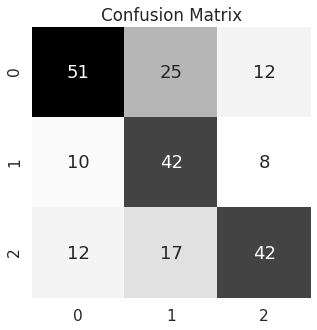

In [0]:
df_cm = pd.DataFrame(cm)
plt.figure(figsize=(5,5))
sn.set(font_scale=1.4) # for label size

sn.heatmap(df_cm, annot=True, annot_kws={"size": 18}, cbar=False, cmap='Greys').set_title('Confusion Matrix') # font size

plt.show()

# **Medium Source**

In [0]:
!pip install fasttext

     |████████████████████████████████| 71kB 3.2MB/s 
  Created wheel for fasttext: filename=fasttext-0.9.2-cp36-cp36m-linux_x86_64.whl size=3021285 sha256=2ffd1afefbcfaccac4369f8c81db8e0340edb25dbd89dff26e031ca6bc5735cd
  Stored in directory: /root/.cache/pip/wheels/98/ba/7f/b154944a1cf5a8cee91c154b75231136cc3a3321ab0e30f592
Successfully built fasttext


In [0]:
!pip install gensim

In [0]:
from gensim.models.fasttext import FastText
model = FastText.load_fasttext_format('/content/drive/My Drive/model.bin')


NotImplementedError: ignored

In [0]:
embeddings_index = {}

for w in model.wv.vocab.keys():
  embeddings_index[w] = model.wv[w]

prin('Found %s word vectors.' %len(embeddings_index))

AttributeError: ignored

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=100000)
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)

Using TensorFlow backend.


In [0]:
for x in X_train[:5]:
    print (x)

kerasa ngga atiiiiit …
kalo makhluk gapunya otak dikasih nyawa …
gw salah mulu
selamat sumpah pemuda 28 oktober 2019 kemajuan bangsa genggaman pemuda
help please …


In [0]:
sequences[:5]

[[1107, 31, 2047, 1],
 [9, 738, 2048, 195, 377, 491, 1],
 [13, 34, 245],
 [17, 246, 1108, 2049, 739, 173, 2050, 130, 2051, 1108],
 [2052, 492, 1]]

In [0]:
length = []
for x in X_train:
    length.append(len(x.split()))

In [0]:
max(length)

49

In [0]:
X_train_seq = pad_sequences(sequences, maxlen=75)
print('Shape of data tensor:', X_train_seq.shape)

Shape of data tensor: (1584, 75)


In [0]:
X_train_seq[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 1107,   31, 2047,    1],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    9,  738, 2048,  195,  377,

In [0]:
sequences_val = tokenizer.texts_to_sequences(X_valid)
X_val_seq = pad_sequences(sequences_val, maxlen=75)

In [0]:
num_words = 100000
embedding_matrix = np.zeros((num_words, 100))
for word, i in tokenizer.word_index.items():
    if i >= num_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [0]:
np.array_equal(embedding_matrix[916] ,embeddings_index.get('mode'))

False

In [0]:
seed = 7

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D, AveragePooling1D

In [0]:
model = Sequential()
e = Embedding(100000, 100, weights=[embedding_matrix], input_length=75, trainable=True)
model.add(e)
model.add(Conv1D(filters=100, kernel_size=3, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(X_train_seq, y_train, validation_data=(X_val_seq, y_valid), epochs=10, batch_size=32, shuffle=True, verbose=2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1584 samples, validate on 396 samples
Epoch 1/10
 - 7s - loss: 0.6770 - accuracy: 0.5524 - val_loss: 0.6783 - val_accuracy: 0.5657
Epoch 2/10
 - 7s - loss: 0.5330 - accuracy: 0.7569 - val_loss: 0.6908 - val_accuracy: 0.6086
Epoch 3/10
 - 6s - loss: 0.3100 - accuracy: 0.8832 - val_loss: 0.7560 - val_accuracy: 0.6338
Epoch 4/10
 - 6s - loss: 0.1122 - accuracy: 0.9785 - val_loss: 0.9070 - val_accuracy: 0.6364
Epoch 5/10
 - 6s - loss: 0.0358 - accuracy: 0.9962 - val_loss: 1.0554 - val_accuracy: 0.6237
Epoch 6/10
 - 6s - loss: 0.0153 - accuracy: 0.9981 - val_loss: 1.1729 - val_accuracy: 0.6212
Epoch 7/10
 - 6s - loss: 0.0096 - accuracy: 0.9981 - val_loss: 1.3136 - val_accuracy: 0.6212
Epoch 8/10
 - 6s - loss: 0.0081 - accuracy: 0.9981 - val_loss: 1.3540 - val_accuracy: 0.6187
Epoch 9/10
 - 6s - loss: 0.0067 - accuracy: 0.9981 - val_loss: 1.4369 - val_accuracy: 0.6288
Epoch 10/10
 - 6s - loss: 0.0058 - accuracy: 0.9981 - val_loss: 1.5257 - val_accuracy: 0.6263


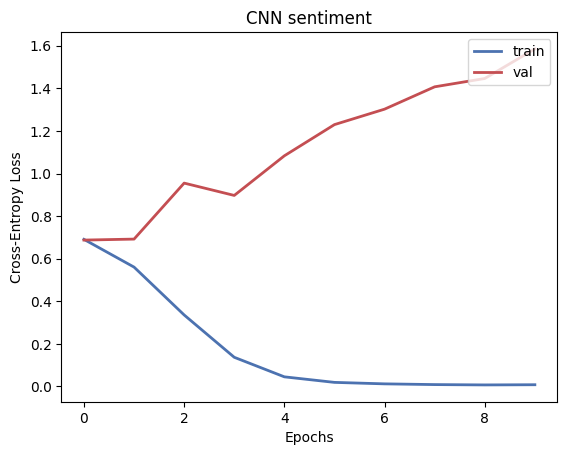

In [0]:
plt.style.use('default')

plt.figure()
plt.plot(hist.history['loss'], lw=2.0, color='b', label='train')
plt.plot(hist.history['val_loss'], lw=2.0, color='r', label='val')
plt.title('CNN sentiment')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')
plt.show()

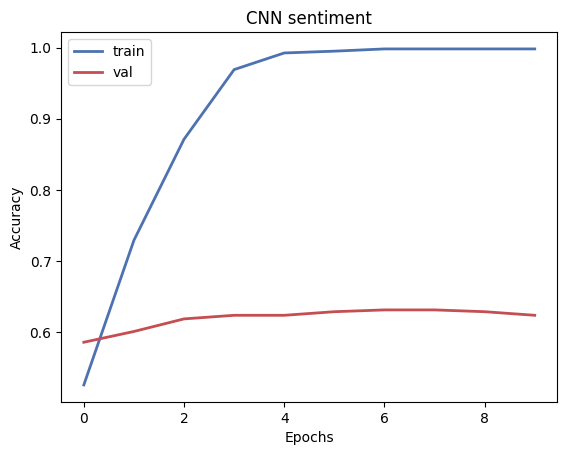

In [0]:
plt.figure()
plt.plot(hist.history['accuracy'], lw=2.0, color='b', label='train')
plt.plot(hist.history['val_accuracy'], lw=2.0, color='r', label='val')
plt.title('CNN sentiment')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

In [0]:
print(X_train.shape,y_train.shape)
print(X_valid.shape,y_valid.shape)

(1584,) (1584,)
(396,) (396,)
